In [14]:
import os,glob
import numpy as np
path = '/Net/Groups/BGI/scratch/swang/Data/D_cube/intensity/'
filelist = glob.glob('{}*.mat'.format(path))


In [15]:
mu = []
alpha = []
beta = []
area=[]
for file in filelist:
    values = []
    filename = os.path.basename(file)
    for t in filename.split('_'):
        try:
            values.append(float(t))
        except ValueError:
            pass
    mu.append(values[0])
    alpha.append(values[1])
    beta.append(values[2])
    
    start = filename.find('Disturbed')+len('Disturbed_')
    end = filename.find('.mat')
    area.append(filename[start:end])
    

In [22]:
import pandas as pd
df = pd.DataFrame({"mu":mu,
              "alpha":alpha,
              "beta":beta,
              "area":area})
df1= df.drop(['beta'],axis=1)
df2 = df1.drop_duplicates(ignore_index=True)


In [25]:
df2 = df2.astype({'area':'int'})

In [27]:
df2.dtypes

mu       float64
alpha    float64
area       int64
dtype: object

In [29]:
#
df2["dif"] = df2["area"]-df2["mu"] * 1000000 
df2 = df2.astype({'dif':'int'})
df3 = df2.pivot("mu", "alpha", "dif")




In [30]:
df3

alpha,1.00,1.05,1.10,1.15,1.20,1.25,1.30,1.35,1.40,1.45,1.50,1.55,1.60,1.65,1.70,1.75,1.80
mu,,,,,,,,,,,,,,,,,
0.010,4,0,2,-10,10,9,-3,-6,5,-5,10,-2,-4,-8,4,0,8
0.015,8,6,2,7,7,-9,7,7,-7,-1,9,-7,-7,-7,7,-3,10
0.020,0,-7,-4,-9,9,10,-10,4,-7,-8,-10,7,-5,-3,-5,10,-6
0.025,-8,9,-6,-1,8,6,-1,-10,-5,10,-8,10,2,-9,-7,-6,1
0.030,4,-10,-9,5,-8,9,-6,-9,-9,2,10,-8,-2,-3,-6,6,-4
0.035,-4,0,9,6,1,-10,-10,-3,5,-10,-6,-9,10,9,-10,-7,10
0.040,-16,5,0,0,4,-9,3,-8,4,5,-10,-3,0,-5,-8,7,-2
0.045,-8,8,8,2,-5,-3,0,2,5,-5,-1,3,7,6,-6,-1,3
0.050,4,0,-2,-7,-6,-2,-5,2,2,-6,3,-9,-3,2,5,10,-1


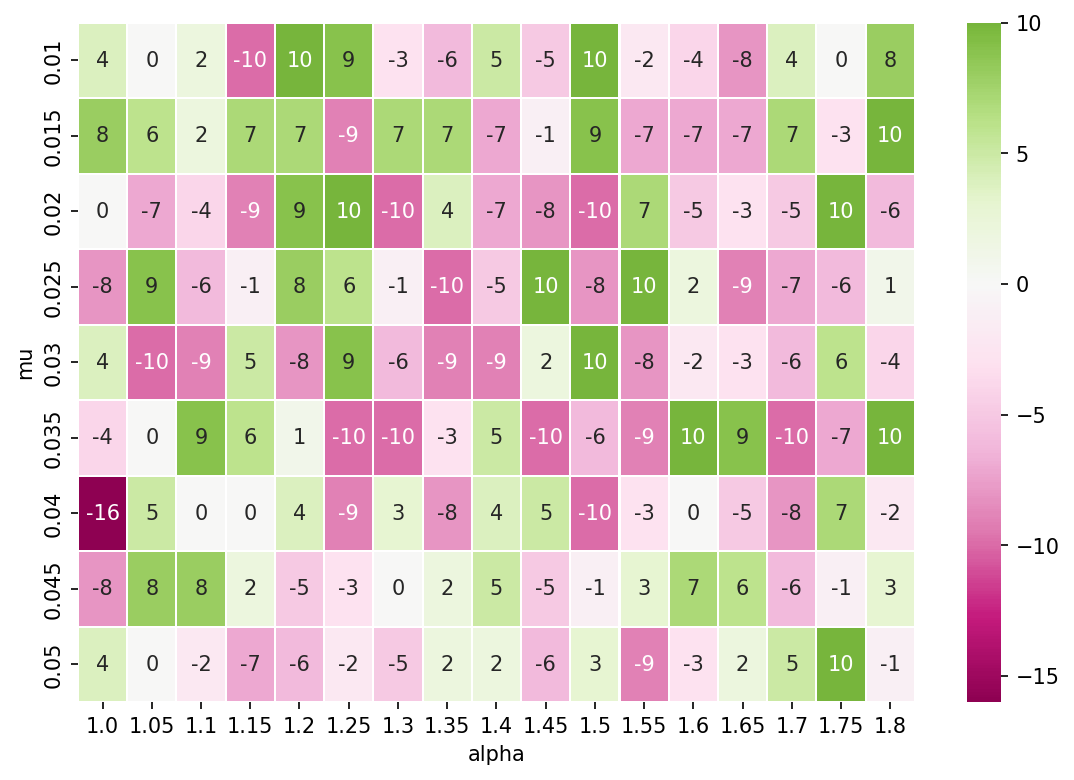

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(9, 6),dpi=150)
ax = sns.heatmap(df3,cmap="PiYG",center=0, annot=True, fmt="d", linewidths=.5, ax=ax)

In [ ]:
flights_long = sns.load_dataset("flights")
flights_long